In [1]:
import os 

In [2]:
df_path = 'C:\\Users\\CLICK\\Downloads\\image_data_sets'

In [3]:
train_path = df_path+'\\train\\'

In [4]:
test_path = df_path+'\\test\\'

In [5]:
#checking to list of dir inside train dir
os.listdir(train_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

Since we have more then two class so this is a multi-class classification problem

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread

In [7]:
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [8]:
#viewing an image
os.listdir(train_path+'\\buildings\\')[0]


'0.jpg'

In [9]:
first_img = train_path+'\\buildings\\'+'0.jpg'

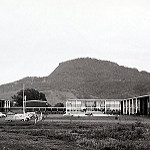

In [10]:
image.load_img(first_img)

In [11]:
#checking the no of images in each class 
def no_of_img(path):
    for clasS in classes:
        num = len(os.listdir(path+clasS))
        print('no of images in '+ clasS +"is :" ,num)

In [12]:
#for train data sets
no_of_img(test_path)

no of images in buildingsis : 437
no of images in forestis : 474
no of images in glacieris : 553
no of images in mountainis : 525
no of images in seais : 510
no of images in streetis : 501


In [13]:
#for test data sets
no_of_img(train_path)

no of images in buildingsis : 2191
no of images in forestis : 2271
no of images in glacieris : 2404
no of images in mountainis : 2512
no of images in seais : 2274
no of images in streetis : 2382


In [14]:
#checking the dimension of the images in test data set
dim1 = []
dim2 = []
for claSs in classes:
    for imge in os.listdir(train_path+claSs+'\\'):
        d1,d2,clolor = imread(train_path+claSs+'\\'+imge).shape
        dim1.append(d1)
        dim2.append(d2)

C:\Users\CLICK\miniconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


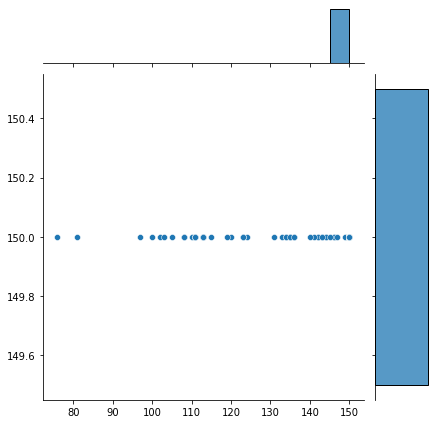

In [15]:
sns.jointplot(dim1,dim2)

so this shows that all the shape of the image area not same so we have to rescale it to the same dimension

In [16]:
image_shape = (150,150,3)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
imread(first_img).max()

255

In [19]:
img_gen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            rescale=1/255,
                            fill_mode='nearest')

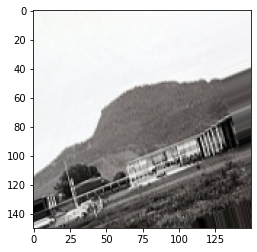

In [20]:
plt.imshow(img_gen.random_transform(imread(first_img)))

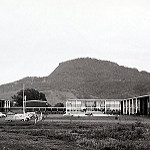

In [21]:
#lets see the orginal image
image.load_img(first_img)

the augmented image is actually zoomed 

In [22]:
img_gen.flow_from_directory(test_path)

Found 3000 images belonging to 6 classes.


In [23]:
img_gen.flow_from_directory(train_path)

Found 14034 images belonging to 6 classes.


In [24]:
imread(first_img).shape

(150, 150, 3)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [26]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(258,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [27]:
#importing earlystoping for overfiting
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [29]:
batch_size = 10

In [30]:
train_img_gen = img_gen.flow_from_directory(train_path,target_size = (150,150),color_mode='rgb',batch_size = batch_size,class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [35]:
test_img_gen = img_gen.flow_from_directory(test_path,target_size = (150,150),color_mode='rgb',batch_size=batch_size,class_mode='categorical',shuffle=False)

Found 3000 images belonging to 6 classes.


In [36]:
train_img_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [37]:
model.fit(train_img_gen,epochs=20,validation_data=test_img_gen,callbacks=[early_stop])

Epoch 1/20
1404/1404 [==============================] - 312s 222ms/step - loss: 0.9555 - accuracy: 0.6366 - val_loss: 0.9197 - val_accuracy: 0.6643
Epoch 2/20
1404/1404 [==============================] - 303s 216ms/step - loss: 0.8566 - accuracy: 0.6840 - val_loss: 0.7122 - val_accuracy: 0.7447
Epoch 3/20
1404/1404 [==============================] - 298s 212ms/step - loss: 0.7664 - accuracy: 0.7190 - val_loss: 0.7374 - val_accuracy: 0.7510


In [70]:
model.save('img_class0.h5')

In [38]:
loss_acc_df = pd.DataFrame(model.history.history)

In [39]:
loss_acc_df

,loss,accuracy,val_loss,val_accuracy
0,0.955469,0.636597,0.919698,0.664333
1,0.856586,0.683982,0.712240,0.744667
2,0.766373,0.718968,0.737369,0.751000


<AxesSubplot:>

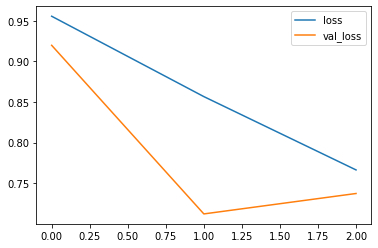

In [40]:
#vizulizing
loss_acc_df[['loss','val_loss']].plot()

from plot we can see the from 3 epoch the validation loss start to increase so it was stoped early 

<AxesSubplot:>

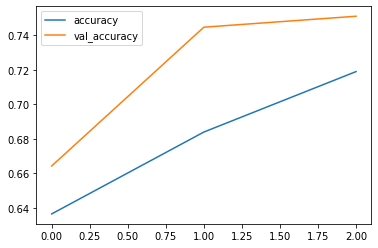

In [41]:
loss_acc_df[['accuracy','val_accuracy']].plot()

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
prediction = model.predict(test_img_gen)

In [44]:
prediction = np.argmax(prediction,axis=1)

In [45]:
test_img_gen.classes

array([0, 0, 0, ..., 5, 5, 5])

In [46]:
print(classification_report(test_img_gen.classes,prediction))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       437
           1       0.72      0.99      0.83       474
           2       0.71      0.80      0.75       553
           3       0.72      0.68      0.70       525
           4       0.76      0.67      0.71       510
           5       0.84      0.61      0.71       501

    accuracy                           0.74      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.75      0.74      0.74      3000



In [69]:
print(confusion_matrix(test_img_gen.classes,prediction))

[[315  29   9  24  15  45]
 [  0 467   0   6   0   1]
 [  4  16 440  51  38   4]
 [  7  14  92 359  52   1]
 [ 29  16  73  44 340   8]
 [ 60 109   9  12   4 307]]


In [63]:
test_img_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [72]:
predict_path = 'C:\\Users\\CLICK\\OneDrive\\Desktop\\seg_pred\\predict_datasets\\' 

enter the no of the images you wanna predict:10
mountain


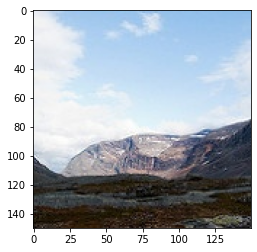

street


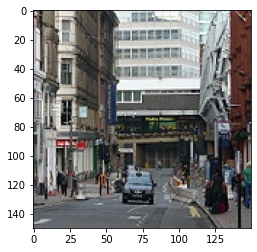

glacier


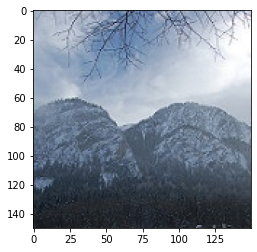

mountain


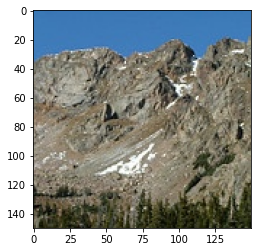

forest


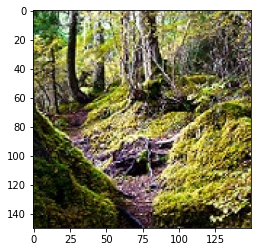

sea


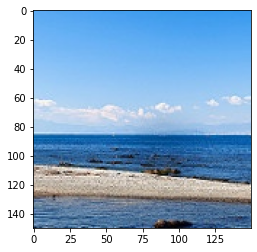

glacier


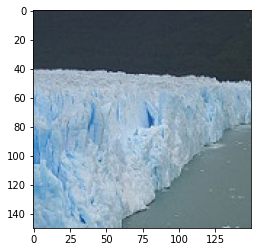

sea


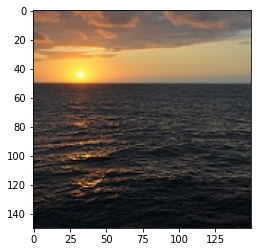

street


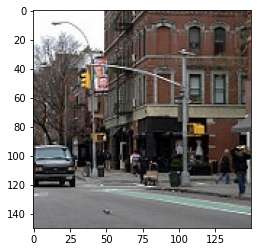

sea


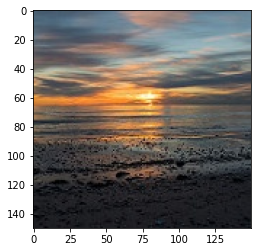

In [142]:
a = int(input("enter the no of the images you wanna predict:"))
for i in range(a):
    imag_path = os.listdir(predict_path)[i+1]
    path = predict_path + imag_path
    b = plt.imshow(imread(path))
    imge = imread(path)
    imge = imge.reshape(1,150,150,3)
    if imge.max()==255:
        imge = imge/255
    predi = np.argmax(model.predict(imge))
    print(classes[predi])
    plt.show()
    
    
        
        
        